In [3]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer, Vars
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs import moving_average, update_plotstyle, constants
update_plotstyle()

In [4]:
#Load basic configuration
configVolcanic=importer('../Config/EBM1D_VolcanicForcing.ini')
variable_importer(configVolcanic,initialZMT=True)
configVolcanic,Paras=add_sellersparameters(configVolcanic,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

#update for Spinup and run
variable_importer(configVolcanic,initialZMT=True,control=True)
Spinup_Volcanic=rk4alg(model_equation,configVolcanic['eqparam'],configVolcanic['funccomp'])

#update for Targetsimulation with Spinup as initial and run
Vars.T,Vars.T_global=Spinup_Volcanic[1][-1],Spinup_Volcanic[2][-1]
variable_importer(configVolcanic,initialZMT=False,control=False)
Data_Volcanic=rk4alg(model_equation,configVolcanic['eqparam'],configVolcanic['funccomp'])

Loading Configuration from: ../Config/EBM1D_VolcanicForcing.ini
Loading Parameters from: ../Config/Data/SellersParameterization.ini


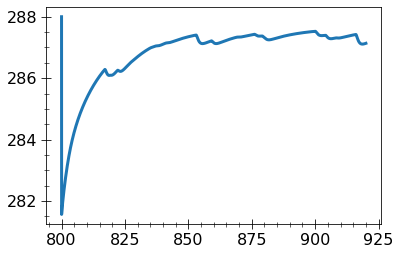

In [5]:
plt.plot(Data_Volcanic[0]/constants.time_sec_year,Data_Volcanic[2])